In [1]:
#Importing All Required Libaries
# Importing the required modules for data analysis and data visualization
import numpy as np 
import pandas as pd
import re
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
# Project Description
# The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

In [2]:
# Imported dataset

url = "https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/World%20Happiness/happiness_score_dataset.csv"
df = pd.read_csv(url)

print(df)


         Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.34951   
1              7.561 

In [ ]:
# The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
# The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.
# The Dystopia Residual is already provided in the dataset. 
# If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores


In [5]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [9]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [6]:
#Display shape
df.shape

(158, 12)

In [7]:
#Checking for Null values
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [8]:
df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


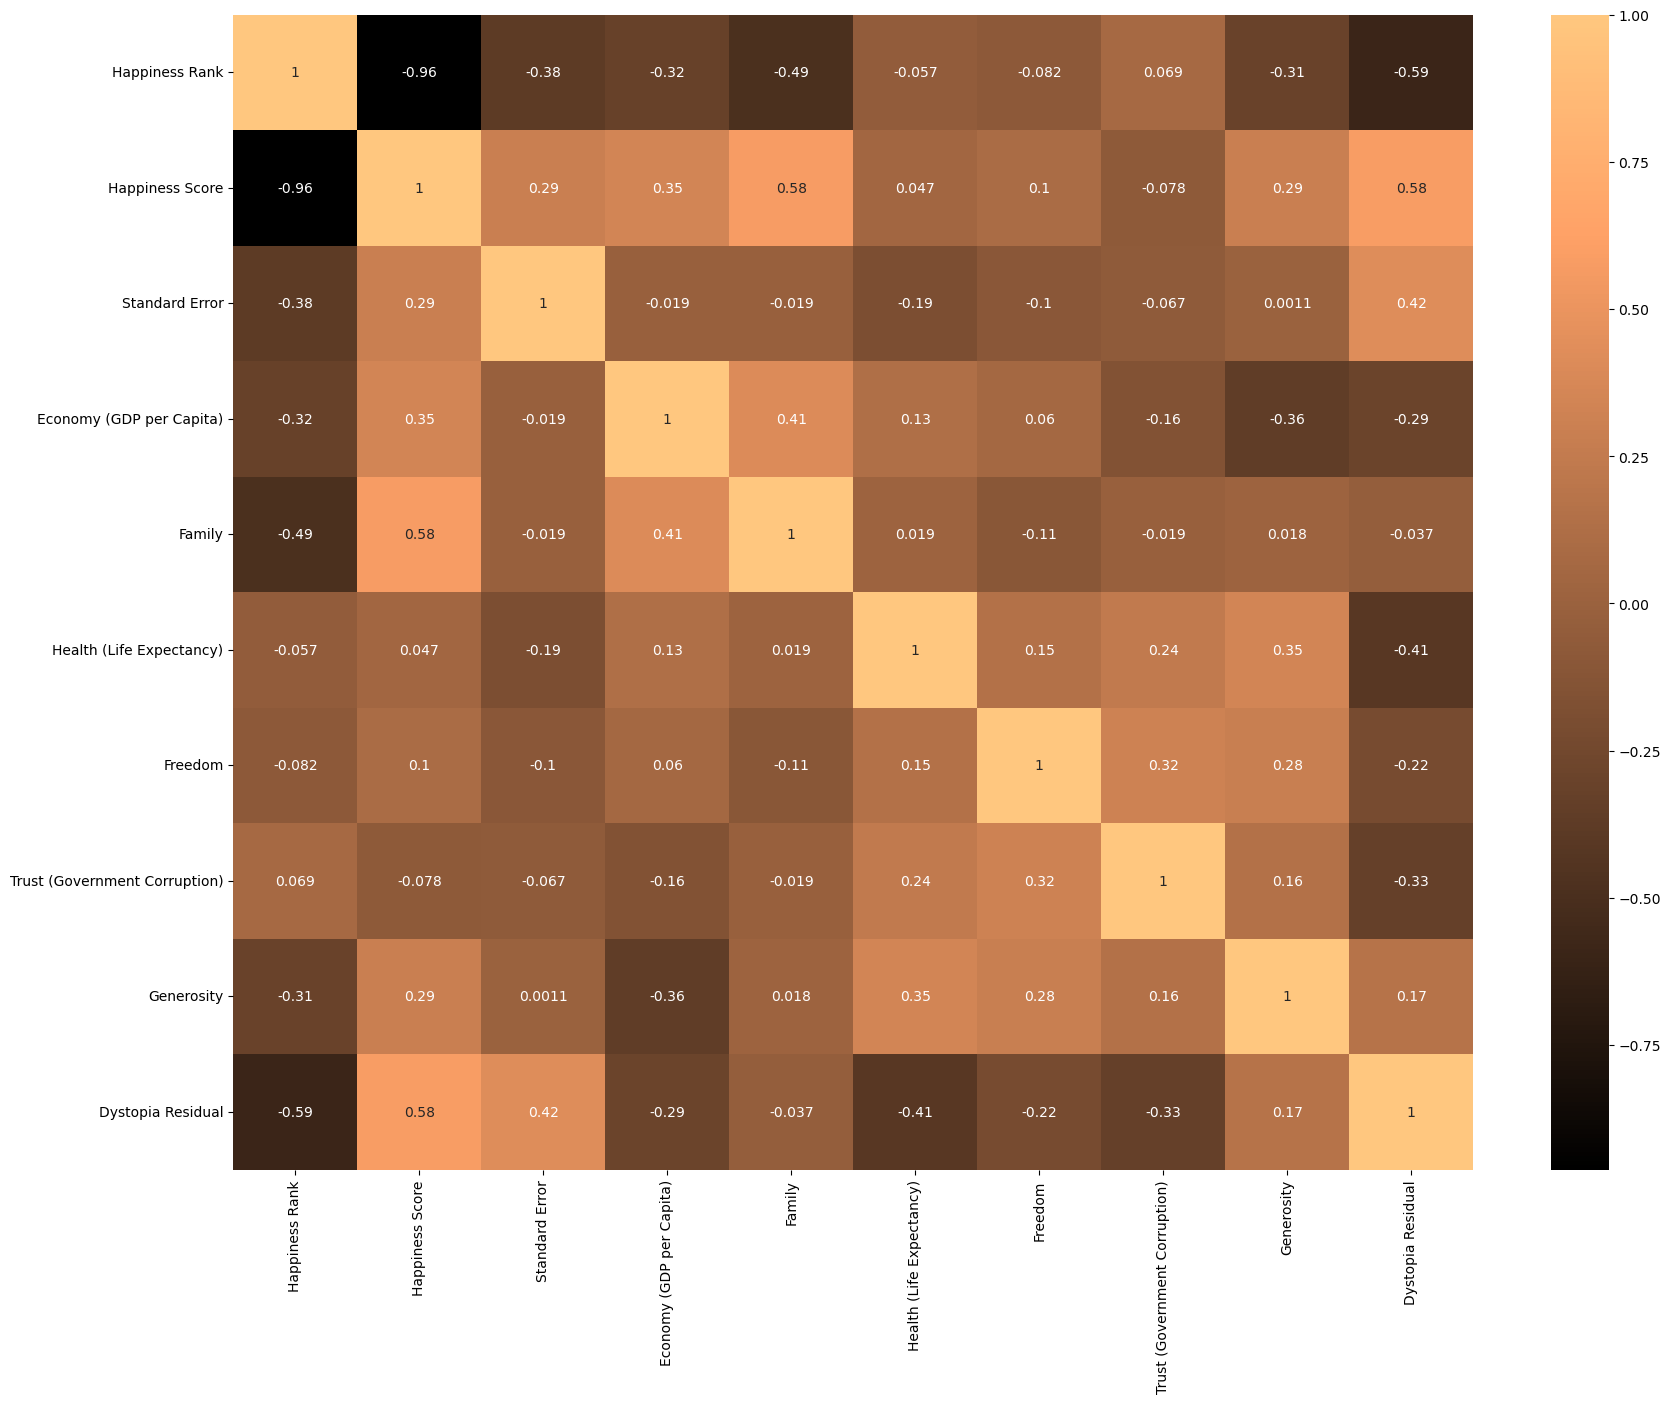

In [18]:
#Correlations Between the Data

plt.rcParams['figure.figsize'] = (20, 15)
sns.heatmap(d.corr(), cmap = 'copper', annot = True)

plt.show()

In [15]:
#In the above Heat Map we can see that Happiness Score is very highly correlated with Economy, Health, and Family Satisfaction and somehow related with Freedom also but it has very low relation with Trust in Government in average case.

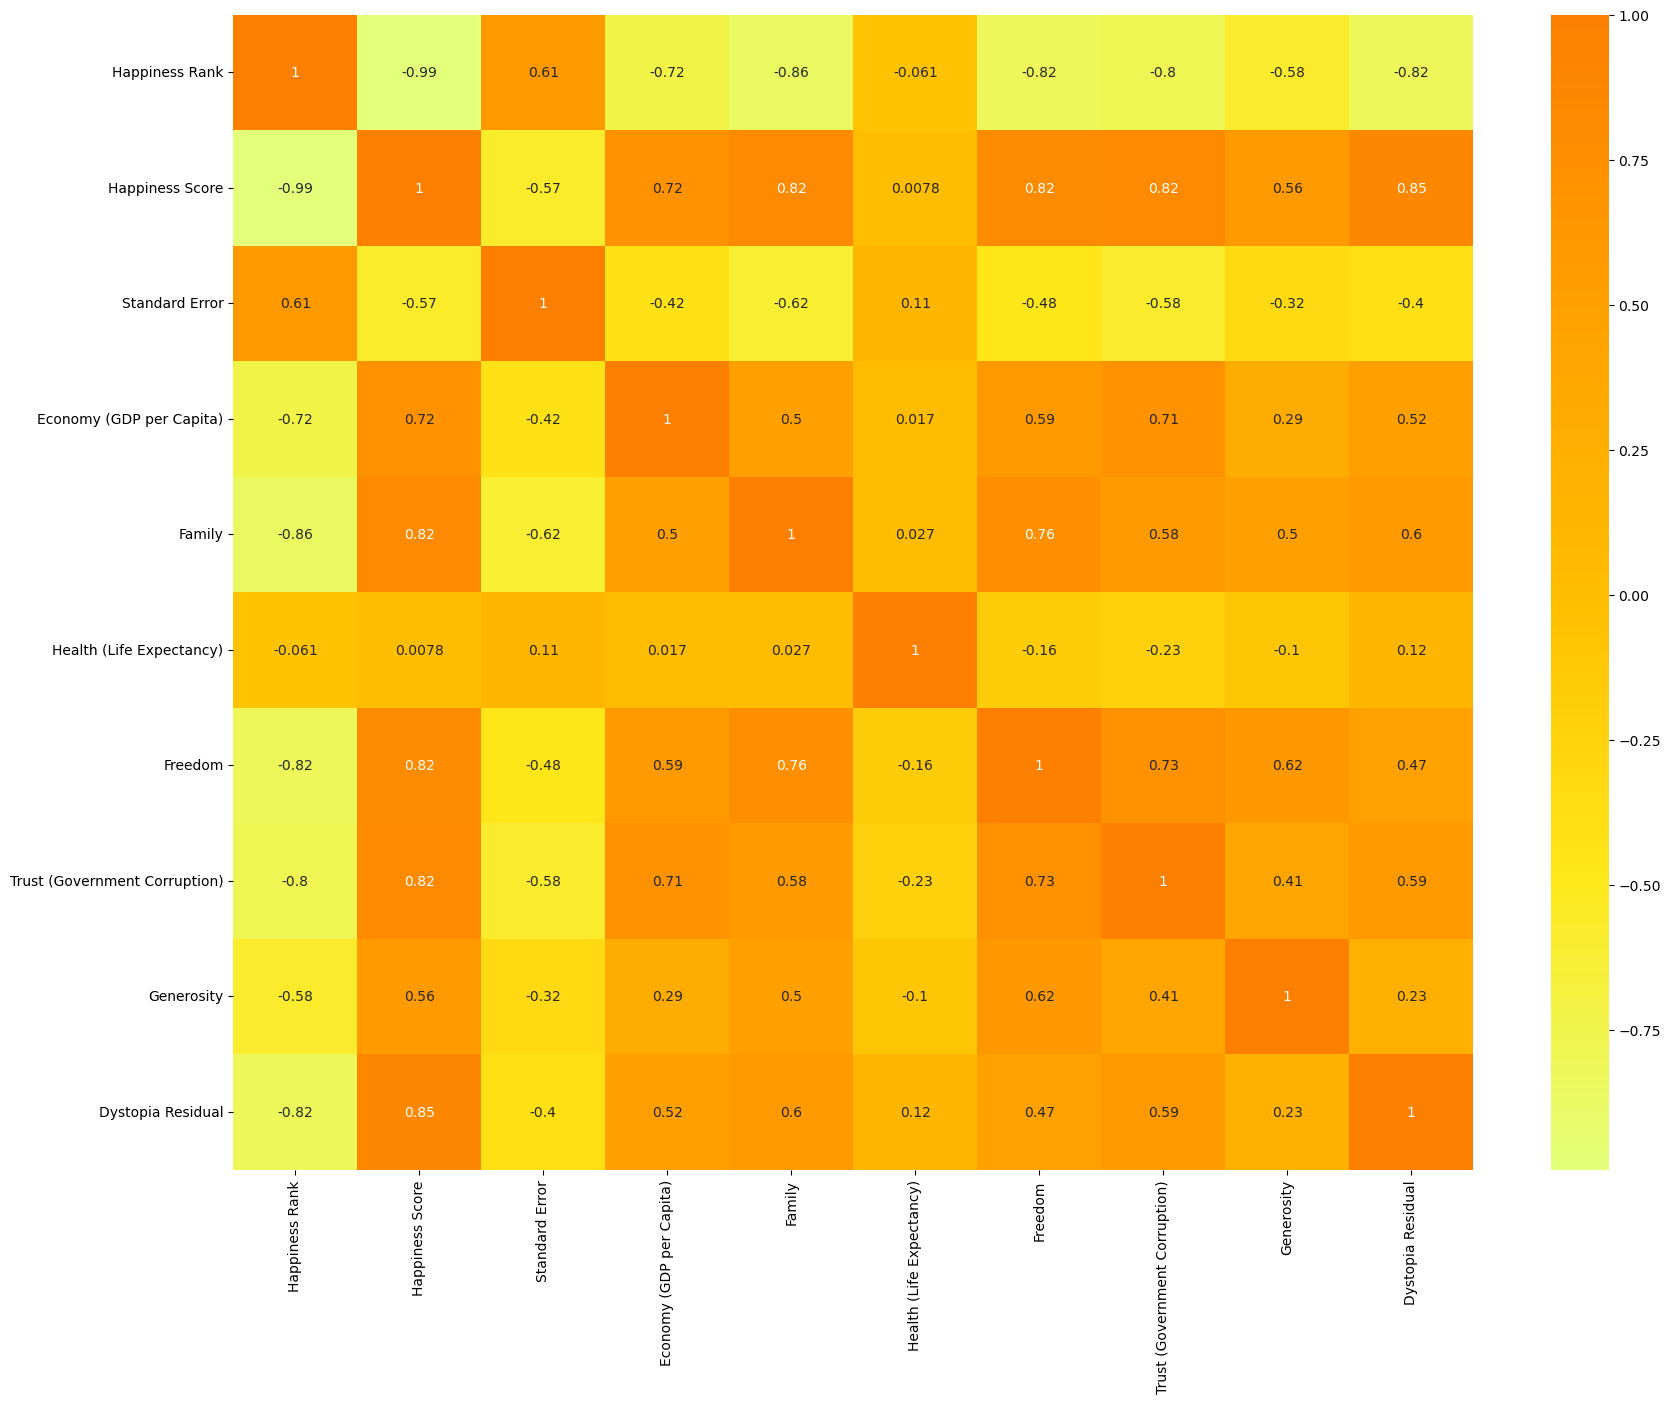

In [19]:
# Correlations for Western Europe

plt.rcParams['figure.figsize'] = (20, 15)
d = df.loc[lambda df: df['Region'] == 'Western Europe']
sns.heatmap(d.corr(), cmap = 'Wistia', annot = True)

plt.show()

In [17]:
# In this heat map we seen that It is highly correlated with Trust in Government.

# The European Region is the Happiest Region.

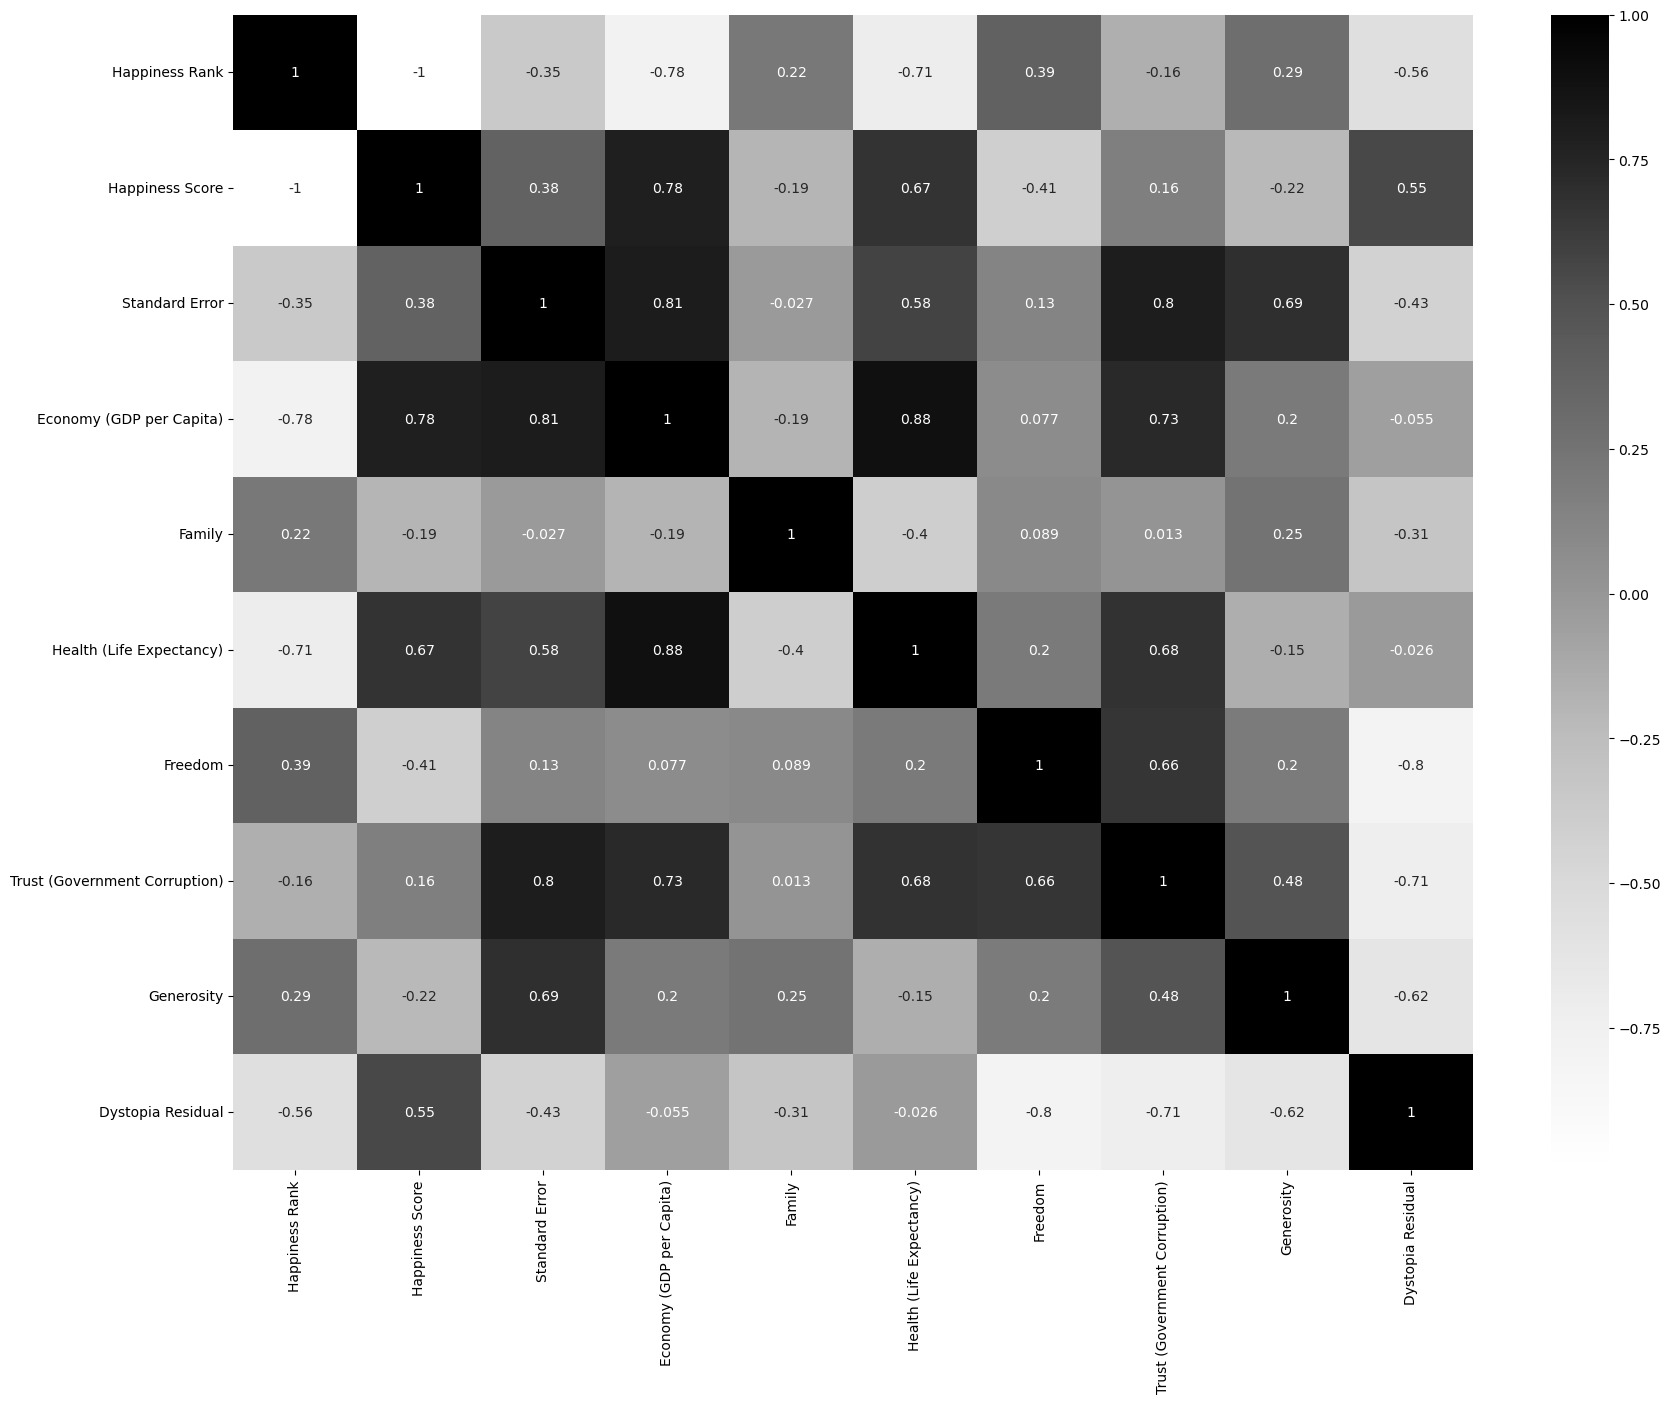

In [20]:
# Correlations for Eastern Asia

plt.rcParams['figure.figsize'] = (20, 15)
d = df.loc[lambda df: df['Region'] == 'Eastern Asia']
sns.heatmap(d.corr(), cmap = 'Greys', annot = True)

plt.show()

In [ ]:
#  The Correlation is negative for many important factors such as Economy, Health, Trust in Government which makes the situation very critical. It has Positive correlations only with Freedom, Generosity and Famlily Satisfaction.

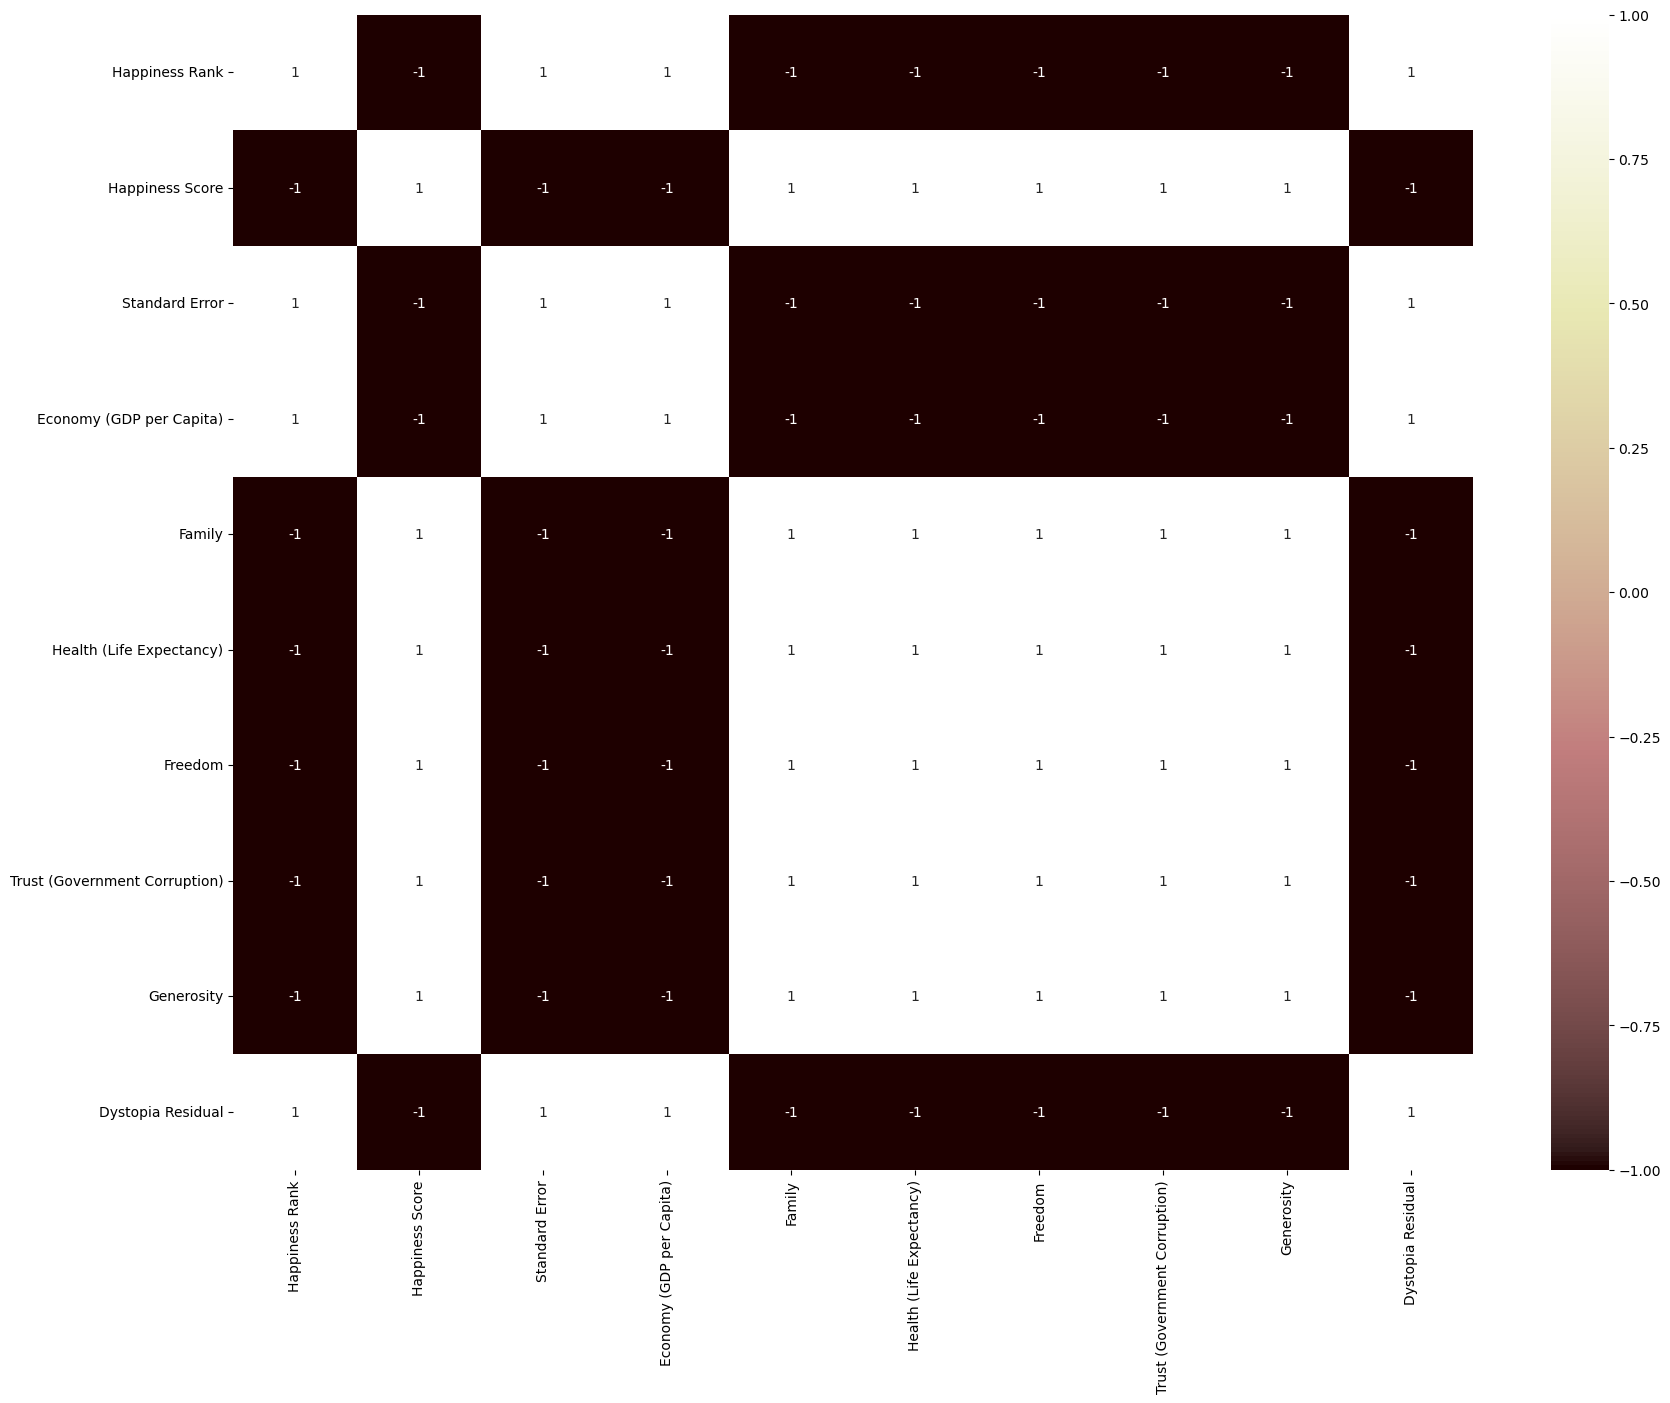

In [14]:
# Correlations for North America

plt.rcParams['figure.figsize'] = (20, 15)
d = df.loc[lambda df: df['Region'] == 'North America']
sns.heatmap(d.corr(), cmap = 'pink', annot = True)

plt.show()


In [ ]:
#  Correlated to the Happiness in America. America is still able to keep their people happy

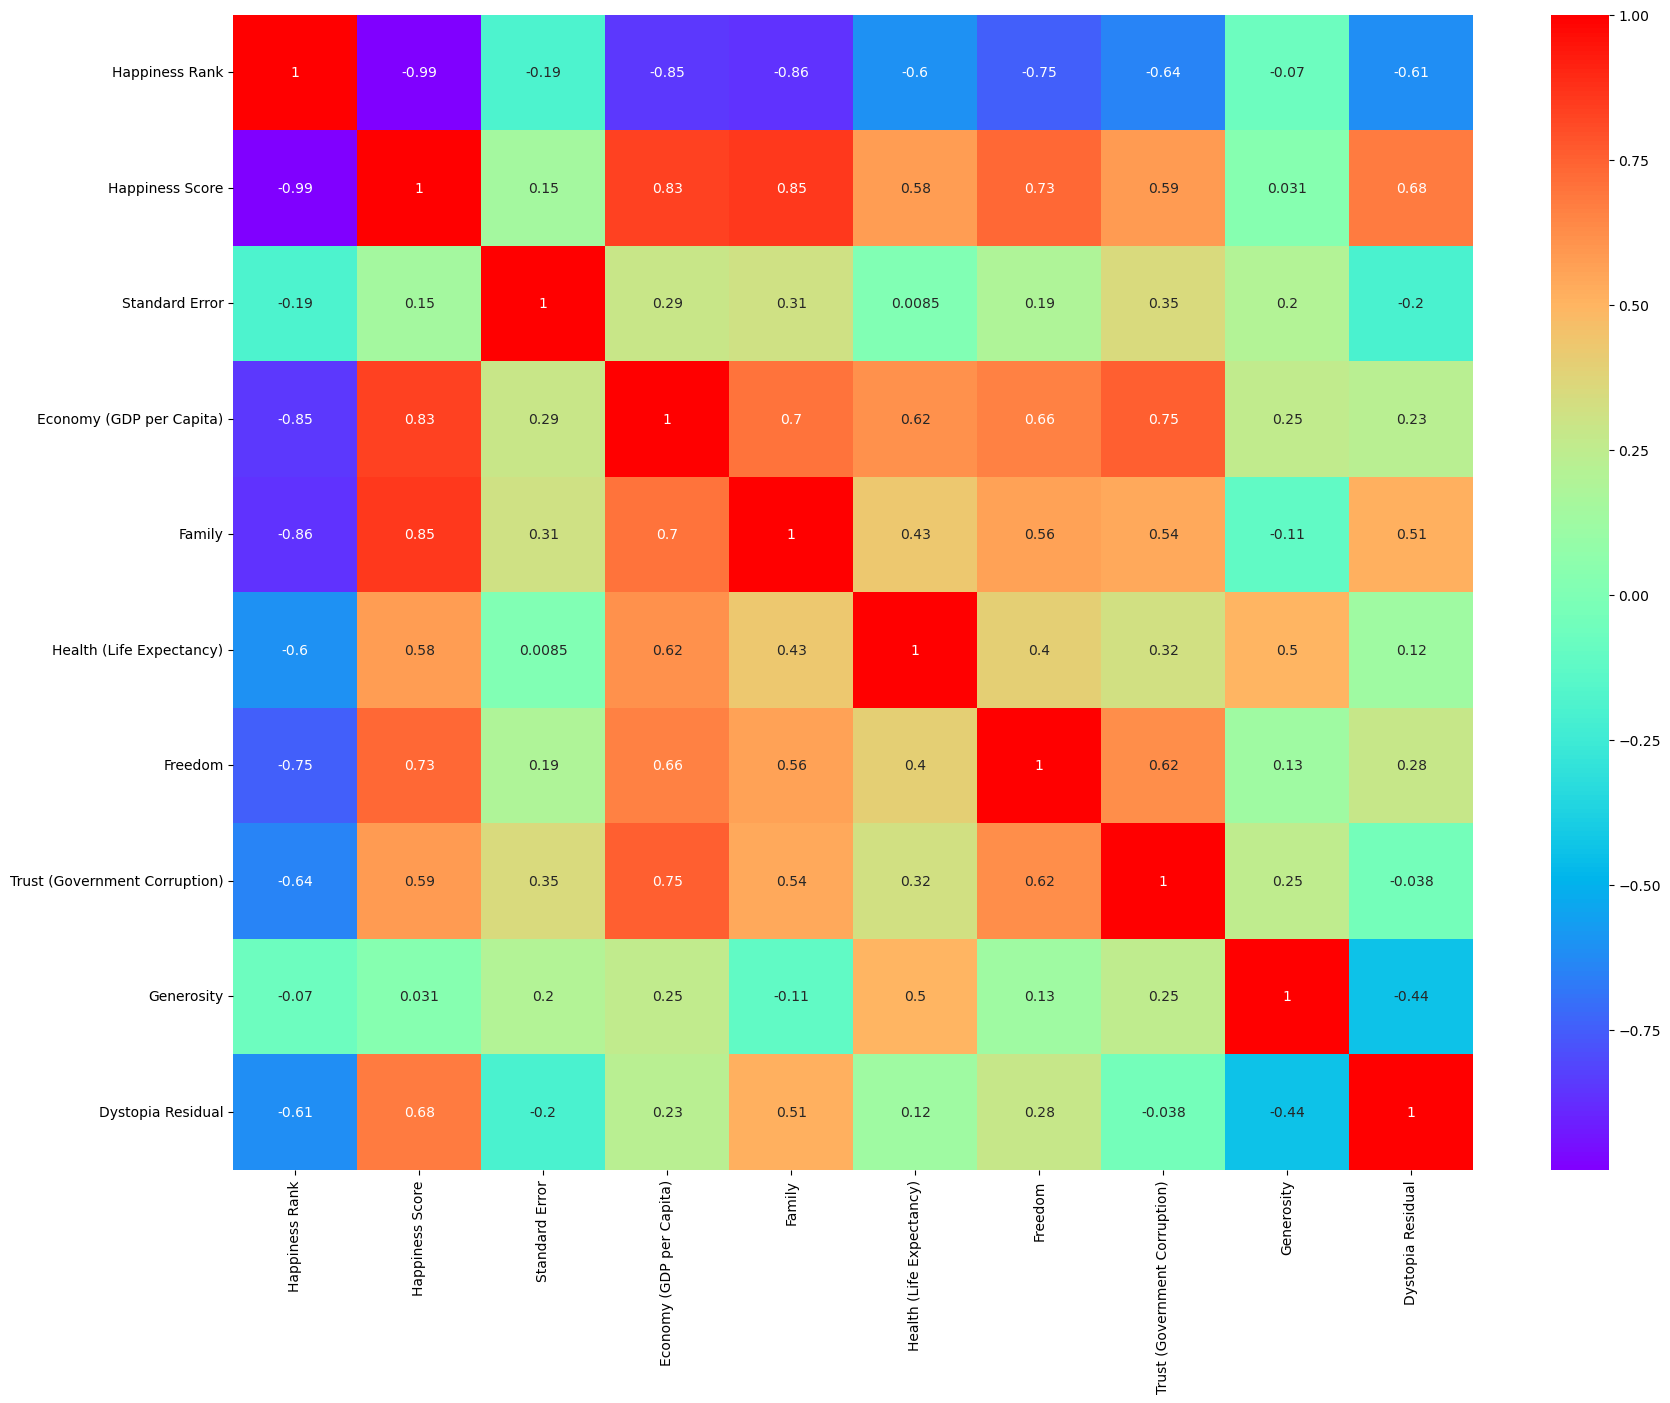

In [15]:
# Middle East and Northern Africa

plt.rcParams['figure.figsize'] = (20, 15)
d = df.loc[lambda df: df['Region'] == 'Middle East and Northern Africa']

sns.heatmap(d.corr(), cmap = 'rainbow', annot = True)

plt.show()

In [ ]:
# The correlations are quite goood with almost all the important factors being highly correlated with Happiness.

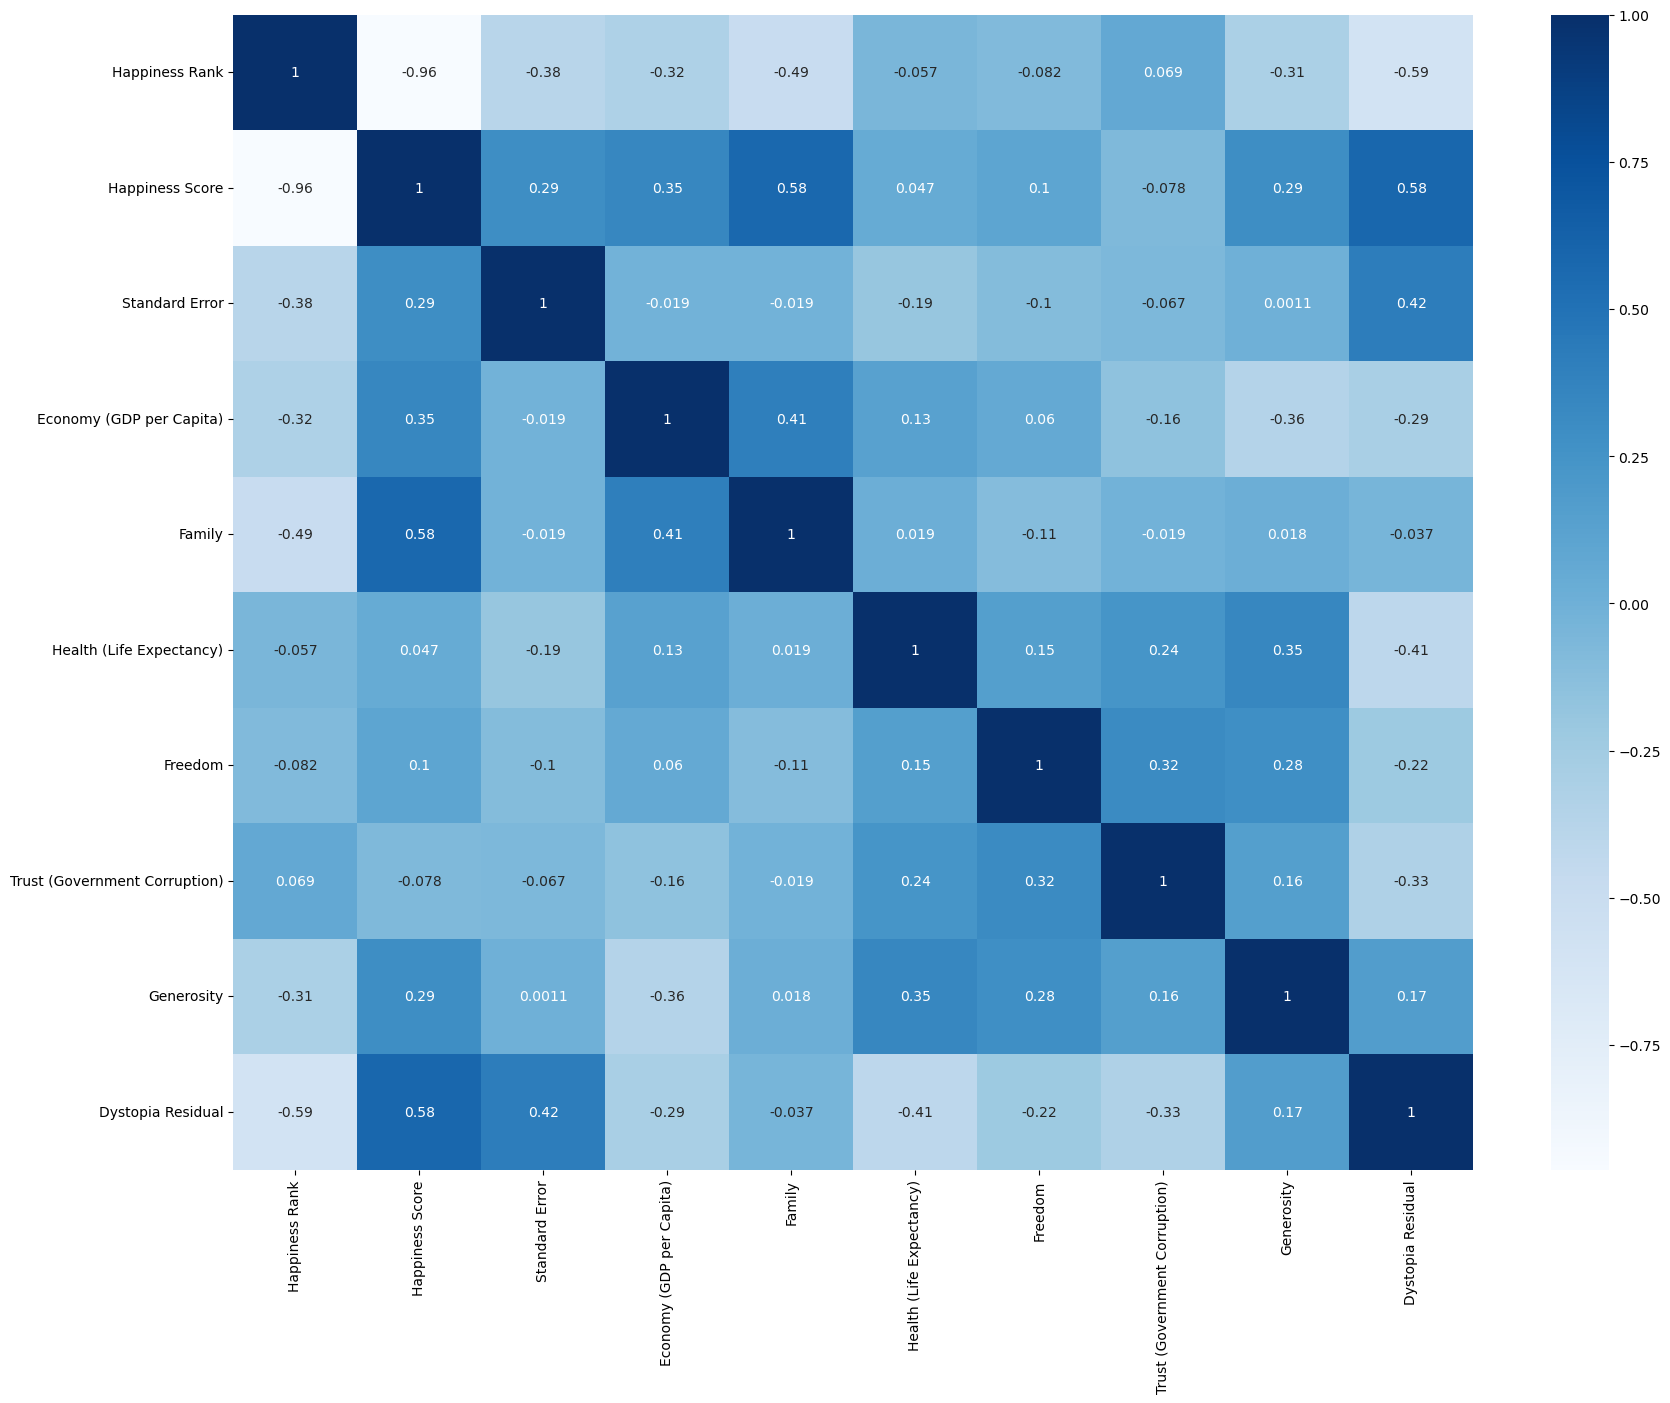

In [17]:
# Sub-Saharan Africa

plt.rcParams['figure.figsize'] = (20, 15)
d = df.loc[lambda df: df['Region'] == 'Sub-Saharan Africa']
sns.heatmap(d.corr(), cmap = 'Blues', annot = True)

plt.show()

In [ ]:
#  The Situations are very bad for Sub-Saharan Region as it is the unhappiest region in the world. The correlations with Happiness Score are very low for features such as Generosity, Family Satisfaction, Freedom etc.

In [3]:
# Top 10 Most Generous Countries

df[['Country', 'Generosity']].sort_values(by = 'Generosity',
                                                ascending = False).head(10)

,Country,Generosity
128,Myanmar,0.79588
33,Thailand,0.57630
20,United Kingdom,0.51912
36,Malta,0.51752
73,Indonesia,0.51535
90,Somaliland region,0.50318
78,Bhutan,0.47998
6,Netherlands,0.47610
8,New Zealand,0.47501
155,Syria,0.47179


In [ ]:
# As seen above, Myanmar,Thailand,United Kingdom,Malta,Indonesia,Somaliland region,Bhutan,Netherlands,New Zealand,Syria are the top Generous countres. 

In [6]:
#  Top 10 Countries with Trust in Government

df[['Country', 'Trust (Government Corruption)']].sort_values(by='Trust (Government Corruption)',
                                                            ascending=False).head(10)


,Country,Trust (Government Corruption)
153,Rwanda,0.55191
27,Qatar,0.52208
23,Singapore,0.49210
2,Denmark,0.48357
7,Sweden,0.43844
8,New Zealand,0.42922
0,Switzerland,0.41978
5,Finland,0.41372
90,Somaliland region,0.39928
19,United Arab Emirates,0.38583


In [ ]:
As above table that mentioned top ten contries who having Trust (Government Corruption).

In [7]:
# Top 10 Countries in Family Satisfaction

df[['Country', 'Family']].sort_values(by = 'Family', ascending = False).head(10)

,Country,Family
1,Iceland,1.40223
17,Ireland,1.36948
2,Denmark,1.36058
0,Switzerland,1.34951
43,Uzbekistan,1.34043
3,Norway,1.33095
4,Canada,1.32261
8,New Zealand,1.31967
5,Finland,1.31826
35,Spain,1.31379


In [ ]:
# All over the world Family Satisfaction rate is really good.Mentioned top ten contries who having Family satisfaction

In [9]:
# Top 10 Countries with Best Economy

df[['Country', 'Economy (GDP per Capita)']].sort_values(by = 'Economy (GDP per Capita)',
            ascending = False).head(10)

,Country,Economy (GDP per Capita)
27,Qatar,1.69042
16,Luxembourg,1.56391
38,Kuwait,1.55422
23,Singapore,1.52186
3,Norway,1.45900
19,United Arab Emirates,1.42727
0,Switzerland,1.39651
34,Saudi Arabia,1.39541
14,United States,1.39451
71,Hong Kong,1.38604


In [10]:
#  Top 10 Most Freedom Oriented Countries

df[['Country', 'Freedom']].sort_values(by = 'Freedom', ascending = False).head(10)

,Country,Freedom
3,Norway,0.66973
0,Switzerland,0.66557
144,Cambodia,0.66246
7,Sweden,0.65980
43,Uzbekistan,0.65821
9,Australia,0.65124
2,Denmark,0.64938
5,Finland,0.64169
19,United Arab Emirates,0.64157
27,Qatar,0.64040


In [12]:
# Top 10 Happiest Countries

df[['Country','Happiness Rank']].head(10)

,Country,Happiness Rank
0,Switzerland,1
1,Iceland,2
2,Denmark,3
3,Norway,4
4,Canada,5
5,Finland,6
6,Netherlands,7
7,Sweden,8
8,New Zealand,9
9,Australia,10


In [ ]:
These are the top 10 contries of Happiness Rank in the world.Switzerland is  topest country for Happiness Rank in the world.